# TP1 GaboG

#### Ejercicio1
Importar algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt


In [2]:
def image_read(image):
    img = cv.imread(image)
    # Cambio coord
    imgRGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    # Muestro la imagen color
    #plt.imshow(imgRGB)
    #plt.show()
    return imgRGB



In [4]:
def image_coord_crom(imgRGB):
    #Split into RGB components
    im_r, im_g, im_b = cv.split(imgRGB)

    #Calculate chromatic coord. 
    den = im_r.astype('uint16') + im_g.astype('uint16') + im_b.astype('uint16') + 0.001 #Evita división por cero
    print(den)
    im_r_new = im_r / den
    im_g_new = im_g / den
    im_b_new = im_b / den
    print(im_r_new)
    #Merge into a new image
    imgRGB_new = cv.merge((im_r_new,im_g_new,im_b_new))

    #Show it
    #plt.imshow(imgRGB_new)
    #plt.show()

    return imgRGB_new
    

In [5]:
imgRGB_1 = image_read('CoordCrom_1.png')
imgRGB_2 = image_read('CoordCrom_2.png')
imgRGB_3 = image_read('CoordCrom_3.png')

In [6]:
imgRGB_new_1 = image_coord_crom(imgRGB_1)
imgRGB_new_2 = image_coord_crom(imgRGB_2)
imgRGB_new_3 = image_coord_crom(imgRGB_3)

[[642.001 641.001 643.001 ... 578.001 569.001 567.001]
 [641.001 641.001 641.001 ... 563.001 572.001 566.001]
 [642.001 644.001 644.001 ... 567.001 568.001 562.001]
 ...
 [410.001 414.001 423.001 ... 330.001 339.001 336.001]
 [415.001 409.001 411.001 ... 339.001 348.001 339.001]
 [412.001 408.001 409.001 ... 349.001 337.001 331.001]]
[[0.33489044 0.33541289 0.33592483 ... 0.36159107 0.36203803 0.36507872]
 [0.33697295 0.33697295 0.33697295 ... 0.36234394 0.36188748 0.36219017]
 [0.33644807 0.33540321 0.33540321 ... 0.36155139 0.36267542 0.36298868]
 ...
 [0.42926725 0.4275352  0.42553091 ... 0.45151378 0.44837626 0.44940342]
 [0.42891463 0.4303168  0.43065589 ... 0.44837626 0.44540102 0.44837626]
 [0.42961061 0.42892052 0.42542683 ... 0.44699012 0.45103724 0.45619198]]
[[342.001 339.001 327.001 ... 257.001 254.001 254.001]
 [336.001 330.001 330.001 ... 254.001 245.001 245.001]
 [330.001 333.001 327.001 ... 254.001 260.001 248.001]
 ...
 [121.001 124.001 120.001 ... 103.001  98.001 104.

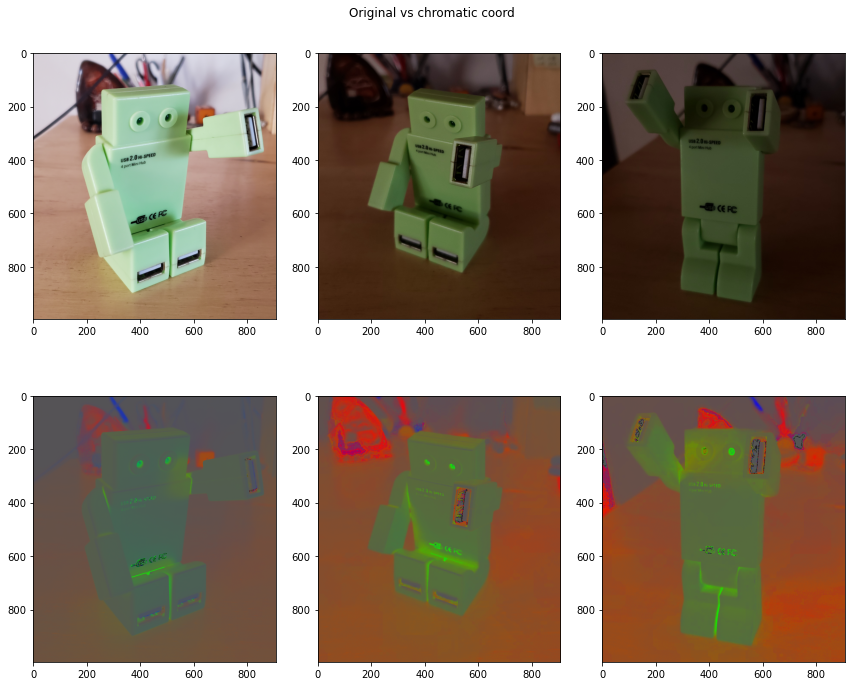

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(12,10))
fig.suptitle('Original vs chromatic coord')
fig.tight_layout() 

axs[0,0].imshow(imgRGB_1)
axs[0,1].imshow(imgRGB_2)
axs[0,2].imshow(imgRGB_3)
axs[1,0].imshow(imgRGB_new_1)
axs[1,1].imshow(imgRGB_new_2)
axs[1,2].imshow(imgRGB_new_3)

#### Ejercicio2

Implementar algoritmo White patch para librarnos de las diferencias de color de iluminación

In [7]:
def image_white_patch(img, perc):
    #Split into RGB components
    im_r, im_g, im_b = cv.split(img)

    #Calculate percentiles, if 100, then took max value
    max_r = np.percentile(im_r, perc)
    max_g = np.percentile(im_g, perc)
    max_b = np.percentile(im_b, perc)

    #Apply white patch algorithm
    im_r_new = np.clip( (255 / max_r) * im_r, 0, 255).astype('uint8')
    im_g_new = np.clip( (255 / max_g) * im_g, 0, 255).astype('uint8')
    im_b_new = np.clip( (255 / max_b) * im_b, 0, 255).astype('uint8')

    #Merge into a new image
    imgRGB_new = cv.merge((im_r_new,im_g_new,im_b_new))

    #Show it
    #plt.imshow(imgRGB_new)
    #plt.show()

    return imgRGB_new

In [8]:
imgWP_1 = image_read('WP_B.png')
imgWP_2 = image_read('WP_O.png')
imgWP_3 = image_read('WP_R.png')

In [9]:
imgWP_new_1_100 = image_white_patch(imgWP_1, 100)
imgWP_new_2_100 = image_white_patch(imgWP_2, 100)
imgWP_new_3_100 = image_white_patch(imgWP_3, 100)

In [10]:
imgWP_new_1_95 = image_white_patch(imgWP_1, 95)
imgWP_new_2_95 = image_white_patch(imgWP_2, 95)
imgWP_new_3_95 = image_white_patch(imgWP_3, 95)

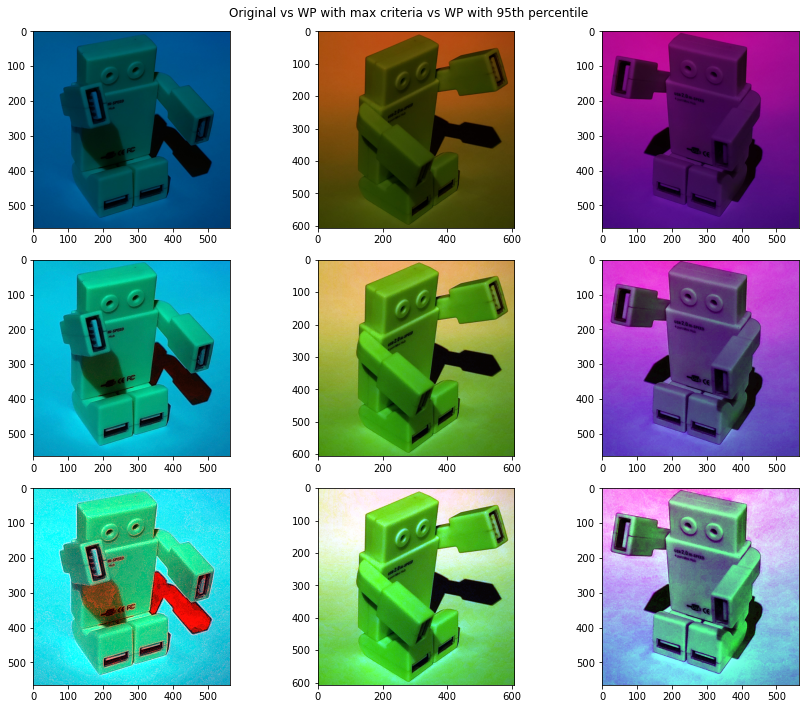

In [11]:
fig, axs = plt.subplots(3, 3, figsize=(12,10))
fig.suptitle('Original vs WP with max criteria vs WP with 95th percentile')
fig.tight_layout() 

axs[0,0].imshow(imgWP_1)
axs[0,1].imshow(imgWP_2)
axs[0,2].imshow(imgWP_3)
axs[1,0].imshow(imgWP_new_1_100)
axs[1,1].imshow(imgWP_new_2_100)
axs[1,2].imshow(imgWP_new_3_100)
axs[2,0].imshow(imgWP_new_1_95)
axs[2,1].imshow(imgWP_new_2_95)
axs[2,2].imshow(imgWP_new_3_95)